# Context

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs [IBM Sample Data Sets (kaggle)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline

# Load Data

In [3]:
current_dir = Path('.').resolve()

In [4]:
current_dir

PosixPath('/mnt/c/Users/siama/Desktop/github/Kaggle/telco_customer_churn')

In [5]:
file_path = current_dir / 'data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [6]:
df = pd.read_csv(file_path)

In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- `TotalCharges` is an object (text) and need to change to a number.
- `Churn` is the dependent variable and an object; however, in machine learning, we are not interested in yes/no, we are interested in the numbers.

# Data Preparation

## Column Names

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## Categorical Variables

In [11]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index

In [12]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

`TotalCharges` is an object (text) and need to change to a number.

In [13]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce') # If 'coerce', then invalid parsing will be set as NaN.

## Dependent Variable

`Churn` is the dependent variable and an object; however, in machine learning, we are not interested in yes/no, we are interested in the numbers.

In [14]:
df['churn'] = (df['churn'] == 'yes').astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


# Setting Up the Validation Framework

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
df_full_train['churn'].value_counts(normalize=True)

0    0.734469
1    0.265531
Name: churn, dtype: float64

In [19]:
df_test['churn'].value_counts(normalize=True)

0    0.735273
1    0.264727
Name: churn, dtype: float64

# Exploratory Data Analysis

In [20]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   seniorcitizen     5634 non-null   int64  
 3   partner           5634 non-null   object 
 4   dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   phoneservice      5634 non-null   object 
 7   multiplelines     5634 non-null   object 
 8   internetservice   5634 non-null   object 
 9   onlinesecurity    5634 non-null   object 
 10  onlinebackup      5634 non-null   object 
 11  deviceprotection  5634 non-null   object 
 12  techsupport       5634 non-null   object 
 13  streamingtv       5634 non-null   object 
 14  streamingmovies   5634 non-null   object 
 15  contract          5634 non-null   object 
 16  paperlessbilling  5634 non-null   object

## Outliers

In [33]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


<AxesSubplot:xlabel='seniorcitizen', ylabel='Count'>

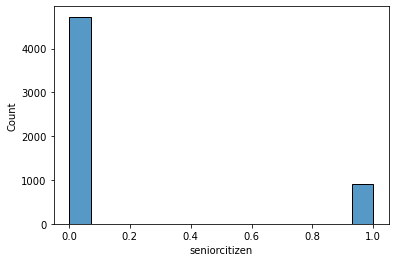

In [38]:
sns.histplot(df_full_train['seniorcitizen'])

<AxesSubplot:xlabel='tenure', ylabel='Count'>

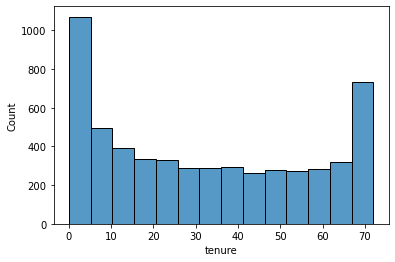

In [39]:
sns.histplot(df_full_train['tenure'])

<AxesSubplot:xlabel='monthlycharges', ylabel='Count'>

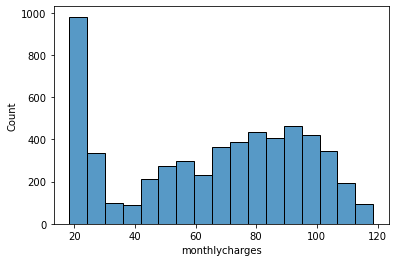

In [40]:
sns.histplot(df_full_train['monthlycharges'])

<AxesSubplot:xlabel='totalcharges', ylabel='Count'>

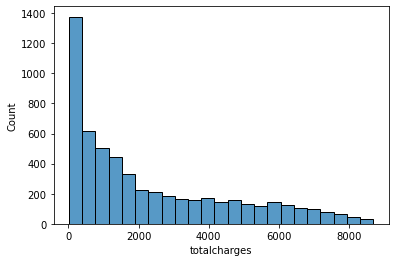

In [41]:
sns.histplot(df_full_train['totalcharges'])

## Missing Values

<AxesSubplot:>

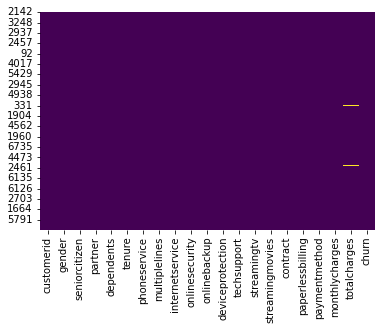

In [42]:
sns.heatmap(df_full_train.isnull(), cbar=False, cmap='viridis')

In [43]:
# get the number of missing data points per column
missing_values_count = df_full_train.isnull().sum()
missing_values_count

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        10
churn                0
dtype: int64

In [44]:
# how many total missing values do we have?
total_cells = np.product(df_full_train.shape)
total_missing = missing_values_count.sum()

In [45]:
# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
percent_missing

0.008452085129401423

In [48]:
df_full_train['totalcharges'].fillna(df_full_train['totalcharges'].mean(), inplace=True)

<AxesSubplot:>

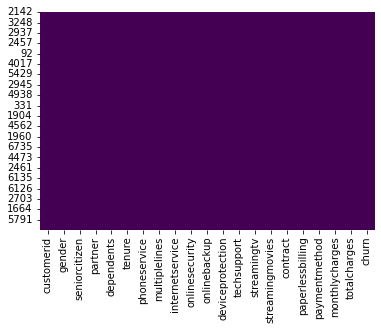

In [49]:
sns.heatmap(df_full_train.isnull(), cbar=False, cmap='viridis')

In [50]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## Duplicate Values

In [53]:
df_full_train.duplicated().sum()

0